In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Primero se carga base de datos con población de las comunas para ver cuanta gente estuvo en cuarentena (se asume que nadie viaja)
poblacion_comunas = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true', sep=',')
poblacion_comunas.head()

#No importa la cantidad de casos activos en cada fecha, solo la población y el estado de cuarentena, entonces se limpia la data
pob_comunas = poblacion_comunas[["Region", "Codigo region", "Comuna", "Codigo comuna", "Poblacion"]]
pob_comunas

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101.0,247552.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN
...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0
358,Magallanes,12,San Gregorio,12104.0,681.0
359,Magallanes,12,Timaukel,12303.0,282.0
360,Magallanes,12,Torres del Paine,12402.0,1021.0


In [3]:
# Comunas llamadas "Desconocido XX" no tienen código ni datos, se deben limpiar esos NaN
pob_comunas = pob_comunas.dropna()

# los tipos de datos tienen que ser uniformes, en este caso es mejor tener todos los datos como enteros
pob_comunas["Codigo comuna"] = pob_comunas["Codigo comuna"].astype(int)
pob_comunas["Poblacion"] = pob_comunas["Poblacion"].astype(int)
pob_comunas

<ipython-input-3-61cd5fce993a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pob_comunas["Codigo comuna"] = pob_comunas["Codigo comuna"].astype(int)
<ipython-input-3-61cd5fce993a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pob_comunas["Poblacion"] = pob_comunas["Poblacion"].astype(int)


,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101,247552
1,Arica y Parinacota,15,Camarones,15102,1233
2,Arica y Parinacota,15,General Lagos,15202,810
3,Arica y Parinacota,15,Putre,15201,2515
5,Tarapacá,1,Alto Hospicio,1107,129999
...,...,...,...,...,...
356,Magallanes,12,Punta Arenas,12101,141984
357,Magallanes,12,Rio Verde,12103,211
358,Magallanes,12,San Gregorio,12104,681
359,Magallanes,12,Timaukel,12303,282


In [4]:
#Luego se descarga data de cuarentenas totales
cuarentenas = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto29/Cuarentenas-Totales.csv?raw=true', sep=',')

#Solo se necesitan datos de región, comuna y fechas
cuarent = cuarentenas[["Region", "Nombre", "Código CUT Comuna", "Fecha de Inicio", "Fecha de Término"]]

#Idealmente tener columnas con mismo nombre para unir las bases de datos
cuarent = cuarent.rename(columns = {"Region" : "nRegion", "Código CUT Comuna" : "Codigo comuna", "Nombre" : "Comuna", "Fecha de Inicio" : "Inicio", "Fecha de Término" : "Termino"})
cuarent

,nRegion,Comuna,Codigo comuna,Inicio,Termino
0,15,Arica,15101,2020-04-16 22:00:00,2020-05-15 22:00:00
1,13,Santiago Norte,13101,2020-04-13 05:00:00,2020-05-05 22:00:00
2,13,Puente Alto Poniente,13201,2020-04-09 22:00:00,2020-05-08 22:00:00
3,13,El Bosque,13105,2020-04-16 22:00:00,2020-09-21 05:00:00
4,13,San Bernardo Nororiente,13401,2020-04-16 22:00:00,2020-05-08 22:00:00
...,...,...,...,...,...
182,9,Angol,9201,2020-12-10 05:00:00,2020-12-25 22:00:00
183,12,Cabo de Hornos,12201,2020-12-10 05:00:00,2020-12-25 22:00:00
184,8,Los Ángeles,8301,2020-12-12 05:00:00,2020-12-25 22:00:00
185,14,Paillaco,14107,2020-12-12 05:00:00,2020-12-23 05:00:00


In [5]:
# Ahora hay que limpiar los datos de fecha y dejarlos en formato de fecha

# Primero se les quita la hora [NO CORRER ESTO DOS VECES SIN CORRER LO ANTERIOR]
fechas = []
for i in range(len(cuarent["Inicio"])):
    fechas.append(cuarent["Inicio"][i][:10])
cuarent["Inicio"] = np.array(fechas)

fechas = []
for i in range(len(cuarent["Termino"])):
    fechas.append(cuarent["Termino"][i][:10])
cuarent["Termino"] = np.array(fechas)



In [6]:
#Luego se ajusta el formato a las fechas
cuarent["Inicio"] = pd.to_datetime(cuarent["Inicio"], format= "%Y-%m-%d")
cuarent["Termino"] = pd.to_datetime(cuarent["Termino"], format= "%Y-%m-%d")

In [7]:
# Ahora se unen las bases de datos. Lo más importante tener solo las comunas con información de inicio y fin de cuarenta.
#Para evitar problemas en discordancias con los nombres se hará el merge respecto al número de comuna.
base_datos = pd.merge(cuarent, pob_comunas[["Region", "Codigo comuna", "Poblacion"]], on = "Codigo comuna")
base_datos

,nRegion,Comuna,Codigo comuna,Inicio,Termino,Region,Poblacion
0,15,Arica,15101,2020-04-16,2020-05-15,Arica y Parinacota,247552
1,15,Arica Re-Ingreso urbano,15101,2020-07-14,2020-11-09,Arica y Parinacota,247552
2,13,Santiago Norte,13101,2020-04-13,2020-05-05,Metropolitana,503147
3,13,Santiago,13101,2020-03-26,2020-04-13,Metropolitana,503147
4,13,Santiago Extensión a Total,13101,2020-05-05,2020-08-17,Metropolitana,503147
...,...,...,...,...,...,...,...
182,8,Arauco,8202,2020-12-10,2020-12-25,Biobío,38679
183,9,Los Sauces,9206,2020-12-10,2020-12-23,Araucanía,7517
184,8,Los Ángeles,8301,2020-12-12,2020-12-25,Biobío,218515
185,14,Paillaco,14107,2020-12-12,2020-12-23,Los Ríos,20798


In [8]:
#Se debe crear una serie de tiempo que empiece desde la primera entrada a cuarentena hasta la última salida
fecha_min = min(base_datos["Inicio"])
fecha_max = max(base_datos["Inicio"])
fechas = pd.date_range(start = fecha_min, end = fecha_max)
#print(len(fechas), fecha_min, fecha_max) #esta línea muestra que se está analizando un periodo de 276 días, desde el 12 de marzo 2021 hasta 12 de diciembre 2021

In [9]:
# Ahora es necesario calcular la cantidad de personas en cuarentena por región en cada fecha

#La siguiente función recibe número de region, intervalo de fechas y calcula para cada fecha el n de personas en cuarentena
#La función retorna una lista de cantidad de personas con el mismo largo del intervalo de fechas, condiciendose con el intervalo entregado
def personas_cuarentena_region(nreg, fechas):
    n_cuarentena = []
    comunas_cuarentena = [] #Lista con comunas en cuarentena durante la fecha iterada. Supuesto: Cuarentena incluye fecha de inicio pero NO LA DE TERMINO
    
    for fecha in fechas:
         #Primero se ve si una comuna entró en cuarentena en la fecha iterada y se agrega a la lista de comunas en cuarentena
        indice = -1
        for f_inicio in base_datos["Inicio"]:
            indice += 1
            if f_inicio == fecha and base_datos["nRegion"][indice] == nreg:
                comunas_cuarentena.append(base_datos["Comuna"][indice])
        
         #Primero se ve si una comuna salió de cuarentena en la fecha iterada y se quita de la lista de comunas en cuarentena
        indice = -1
        for f_termino in base_datos["Termino"]:
            indice += 1
            if f_termino == fecha and base_datos["nRegion"][indice] == nreg:
                comunas_cuarentena.remove(base_datos["Comuna"][indice])
        
       
        #Ahora se suma la población de las comunas en cuarentena 
        n = 0 # Cantidad de personas en cuarentena durante la fecha analizada
        for comuna in comunas_cuarentena:
            #print(np.array(base_datos[base_datos["Comuna"] == comuna]["Poblacion"]))
            n += np.array(base_datos[base_datos["Comuna"] == comuna]["Poblacion"])[0]
        n_cuarentena.append(n)
    
    #Se retorna la lista de personas en cuarentena por cada fecha en la serie entregada
    return n_cuarentena 
    

In [10]:
#Se generan listas con cantidad de personas en cuarentena por dia para cada region
n_cuarent_1 = personas_cuarentena_region(1, fechas)
n_cuarent_2 = personas_cuarentena_region(2, fechas)
n_cuarent_3 = personas_cuarentena_region(3, fechas)
n_cuarent_4 = personas_cuarentena_region(4, fechas)
n_cuarent_5 = personas_cuarentena_region(5, fechas)
n_cuarent_6 = personas_cuarentena_region(6, fechas)
n_cuarent_7 = personas_cuarentena_region(7, fechas)
n_cuarent_8 = personas_cuarentena_region(8, fechas)
n_cuarent_9 = personas_cuarentena_region(9, fechas)
n_cuarent_10 = personas_cuarentena_region(10, fechas)
n_cuarent_11 = personas_cuarentena_region(11, fechas)
n_cuarent_12 = personas_cuarentena_region(12, fechas)
n_cuarent_13 = personas_cuarentena_region(13, fechas)
n_cuarent_14 = personas_cuarentena_region(14, fechas)
n_cuarent_15 = personas_cuarentena_region(15, fechas)
n_cuarent_16 = personas_cuarentena_region(16, fechas)


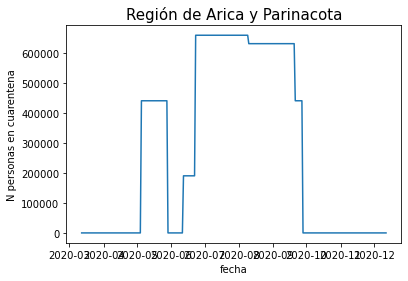


 La mayor cantidad de personas en cuarentena en la región de Arica y Parinacota se dio entre las fechas  2020-06-23 00:00:00  y  2020-08-09 00:00:00  con un total de  658916  personas en cuarentena


In [11]:
plt.plot(fechas, n_cuarent_2)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Arica y Parinacota", fontsize = 15)
plt.show()
indicemin = n_cuarent_2.index(max(n_cuarent_2))
indicemax = len(n_cuarent_2) - n_cuarent_2[::-1].index(max(n_cuarent_2)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Arica y Parinacota se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_2[indicemin], " personas en cuarentena" )

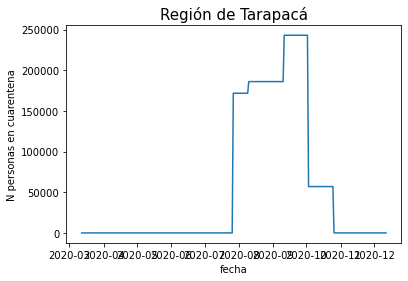


 La mayor cantidad de personas en cuarentena en la región de Tarapacá se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [12]:
plt.plot(fechas, n_cuarent_3)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Tarapacá", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Tarapacá se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

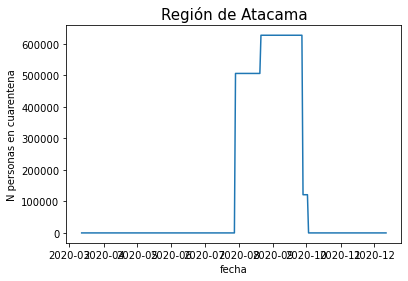


 La mayor cantidad de personas en cuarentena en la región de Atacama se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [13]:
plt.plot(fechas, n_cuarent_4)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Atacama", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Atacama se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

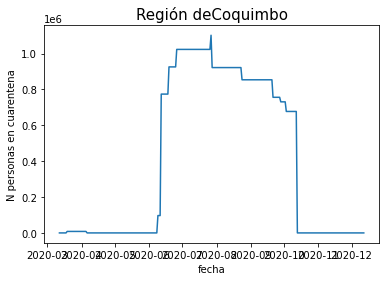


 La mayor cantidad de personas en cuarentena en la región de Coquimbo se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [14]:
plt.plot(fechas, n_cuarent_5)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región deCoquimbo", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Coquimbo se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

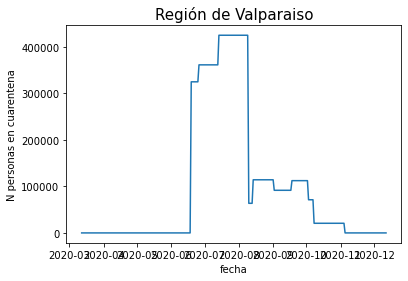


 La mayor cantidad de personas en cuarentena en la región de Valparaiso se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [15]:
plt.plot(fechas, n_cuarent_6)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Valparaiso", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Valparaiso se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

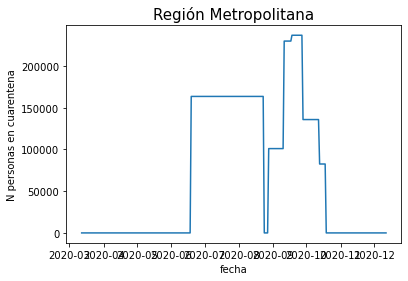


 La mayor cantidad de personas en cuarentena en la región Metropolitana se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [16]:
plt.plot(fechas, n_cuarent_7)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región Metropolitana", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región Metropolitana se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

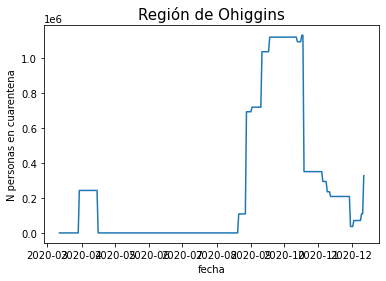


 La mayor cantidad de personas en cuarentena en la región de Ohiggins se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [17]:
plt.plot(fechas, n_cuarent_8)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Ohiggins", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Ohiggins se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

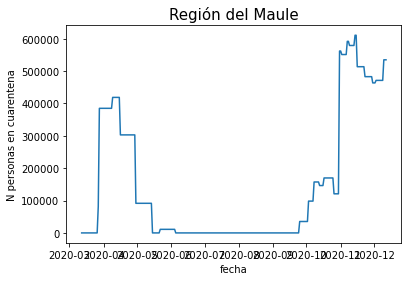


 La mayor cantidad de personas en cuarentena en la región del Maule se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [18]:
plt.plot(fechas, n_cuarent_9)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región del Maule", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región del Maule se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

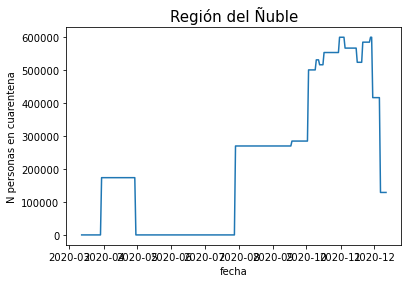


 La mayor cantidad de personas en cuarentena en la región del Ñuble se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [19]:
plt.plot(fechas, n_cuarent_10)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región del Ñuble", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región del Ñuble se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

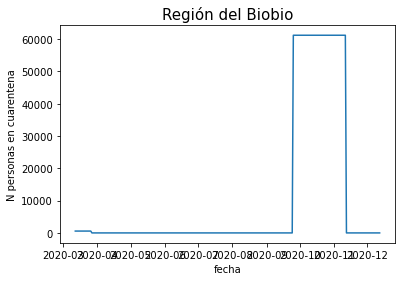


 La mayor cantidad de personas en cuarentena en la región del Biobio se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [20]:
plt.plot(fechas, n_cuarent_11)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región del Biobio", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región del Biobio se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

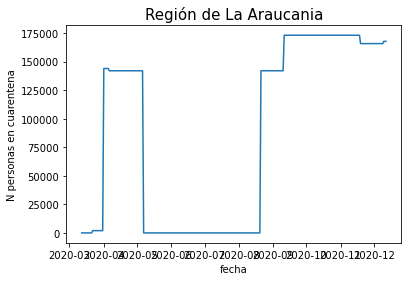


 La mayor cantidad de personas en cuarentena en la región de la Araucania se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [21]:
plt.plot(fechas, n_cuarent_12)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de La Araucania", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de la Araucania se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

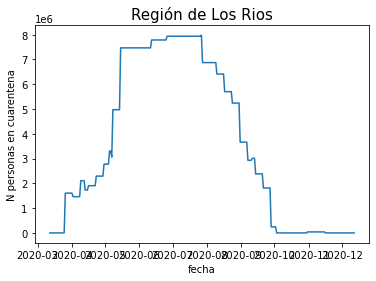


 La mayor cantidad de personas en cuarentena en la región de los Rios se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [22]:
plt.plot(fechas, n_cuarent_13)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Los Rios", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de los Rios se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

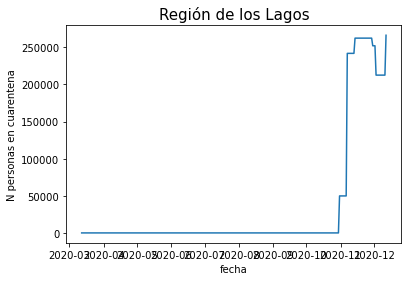


 La mayor cantidad de personas en cuarentena en la región de los Lagos se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [23]:
plt.plot(fechas, n_cuarent_14)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de los Lagos", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de los Lagos se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

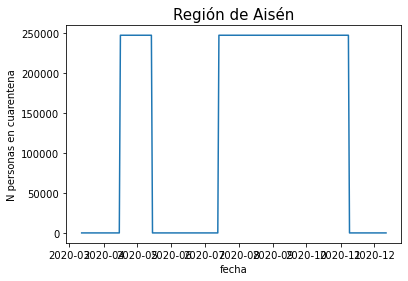


 La mayor cantidad de personas en cuarentena en la región de Aisén se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [24]:
plt.plot(fechas, n_cuarent_15)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Aisén", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Aisén se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )

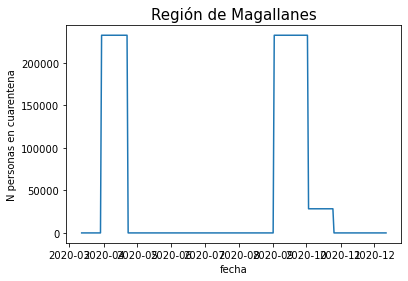


 La mayor cantidad de personas en cuarentena en la región de Magallanes se dio entre las fechas  2020-06-12 00:00:00  y  2020-09-27 00:00:00  con un total de  370857  personas en cuarentena


In [25]:
plt.plot(fechas, n_cuarent_16)
plt.xlabel("fecha")
plt.ylabel("N personas en cuarentena")
plt.title("Región de Magallanes", fontsize = 15)
plt.show()
indicemin = n_cuarent_1.index(max(n_cuarent_1))
indicemax = len(n_cuarent_1) - n_cuarent_1[::-1].index(max(n_cuarent_1)) - 1
print("\n La mayor cantidad de personas en cuarentena en la región de Magallanes se dio entre las fechas ", 
     fechas[indicemin], " y ", fechas[indicemax], " con un total de ", n_cuarent_1[indicemin], " personas en cuarentena" )